In [1]:
#importing useful python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix#,confusion_matrix_at_thresholds
#from sklearn.metrics import confusion_matrix_at_thresholds

In [2]:
#loading dataset
df = pd.read_parquet("subset of baseline with samples 50neg & pos.parquet")

In [3]:
#stepping forward with useful numerical data only
X = df.drop(columns=['object','cluster', 'cluster_id']).values

In [4]:
# object column contains names like 'ZTF18abc...' or non-ZTF names : Binary conversion of objects
y = np.where(df['object'].str.contains('ZTF', case=False),
             -1,   # ZTF → negative
              1)   # non-ZTF → positive

In [5]:
#runthrough
X

array([[ 1.36883456e+01,  1.36851629e+01,  3.58837566e-01, ...,
         5.20519968e+02,  4.32772256e-01,  7.68013461e-01],
       [ 1.73201972e+01,  1.72437497e+01,  2.78425993e-01, ...,
         1.30468214e+02,  8.65308001e-01,  8.04507225e-01],
       [ 1.54368865e+01,  1.54330198e+01,  1.30212161e-01, ...,
         6.32769913e+01,  4.11711919e-01,  7.86535165e-01],
       ...,
       [ 1.80104926e+01,  1.72123293e+01,  1.23640135e+00, ...,
         4.53392793e+02,  8.65250910e-01,  8.86083625e-01],
       [ 1.70137729e+01,  1.69835731e+01,  2.21157098e-01, ...,
         9.81349013e+01,  1.31091092e+00,  6.70645606e-01],
       [ 1.63111787e+01,  1.63002903e+01,  1.86079931e-01, ...,
         1.17600481e+02, -7.29353574e-01,  8.29970429e-01]])

In [6]:
#run accuracy
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
)

final_model = RandomForestClassifier(
    n_estimators=60,
    class_weight="balanced",
   
)

final_model.fit(X_train, y_train)

test_accuracy = final_model.score(X_test, y_test)
print("\nFinal test accuracy:", test_accuracy)



Final test accuracy: 0.925


In [7]:
#this is for checking the class_weight part
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X,
    y,
    test_size=0.20,
)

final_model = RandomForestClassifier(
    n_estimators=60,
    #class_weight="balanced",
   
)

final_model.fit(X_train_1, y_train_1)

test_accuracy = final_model.score(X_test_1, y_test_1)
print("\nFinal test accuracy:", test_accuracy)



Final test accuracy: 0.9625


In [8]:
# Save training set
df_train = pd.DataFrame(X_train)
df_train['y'] = y_train
df_train.to_csv("training_set.csv", index=False)

# Save test set
df_test = pd.DataFrame(X_test)
df_test['y'] = y_test
df_test.to_csv("test_set.csv", index=False)

In [9]:
#Train the Random Forest classifier
clf = RandomForestClassifier(
    n_estimators=60,      # number of trees in my forest
    #random_state=None,     # different forest each run
)

clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=60)

In [10]:
#measuring robustness through 5-fold cross-validation.
scores = cross_val_score(
    clf,
    X,
    y,
    cv=5
)

print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())
print("Std CV accuracy:", scores.std())


Cross-validation scores: [0.96875 0.95    0.95625 0.96875 0.95625]
Mean CV accuracy: 0.96
Std CV accuracy: 0.007500000000000003


In [11]:
# Check class probabilities for the test set.
# predict_proba returns an array of shape (N_test, 2),
# where N_test is the number of test objects.
# Column 0 → probability of class -1 (negative, ZTF)
# Column 1 → probability of class +1 (positive, non-ZTF)
probs = clf.predict_proba(X_test)
print('probs',probs)

probs [[1.         0.        ]
 [0.21666667 0.78333333]
 [0.88333333 0.11666667]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.98333333 0.01666667]
 [0.88333333 0.11666667]
 [0.95       0.05      ]
 [1.         0.        ]
 [0.96666667 0.03333333]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.76666667 0.23333333]
 [0.68333333 0.31666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.23333333 0.76666667]
 [0.93333333 0.06666667]
 [1.         0.        ]
 [0.95       0.05      ]
 [1.         0.        ]
 [0.95       0.05      ]
 [1.         0.        ]
 [0.05       0.95      ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [0.95       0.05  

Confusion matrix (raw counts):
[[560   0]
 [  0  80]]


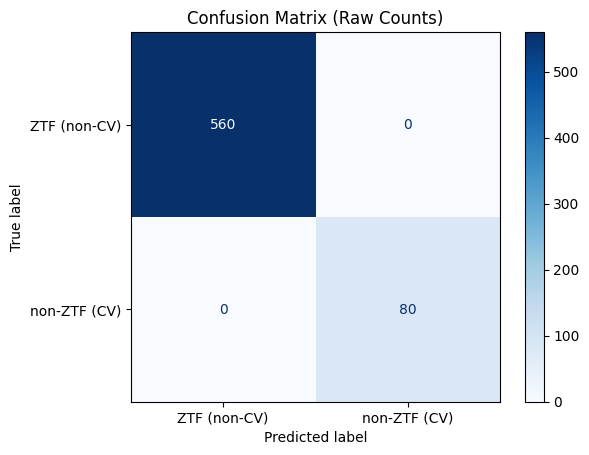


===== CONFUSION MATRIX ELEMENTS =====
True Negatives  (ZTF correctly classified): 560
False Positives (ZTF misclassified as non-ZTF): 0
False Negatives (non-ZTF misclassified as ZTF): 0
True Positives  (non-ZTF correctly classified): 80


In [12]:
# CONFUSION MATRIX + TP / TN / FP / FN IDENTIFICATION
# Class labels for clarity
class_names = ["ZTF (non-CV)", "non-ZTF (CV)"]

# Plot confusion matrix (raw counts)
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train,
    y_train,
    display_labels=class_names,
    cmap=plt.cm.Blues #heatmap
)

disp.ax_.set_title("Confusion Matrix (Raw Counts)")
print("Confusion matrix (raw counts):")
print(disp.confusion_matrix)

plt.show()


# Extract TN, FP, FN, TP explicitly
# Label convention used in YOUR code:
#   -1 → ZTF (negative, non-CV)
#   +1 → non-ZTF (positive, CV)

cm = confusion_matrix(y_train, clf.predict(X_train), labels=[-1, 1])

TN, FP, FN, TP = cm.ravel()

print("\n===== CONFUSION MATRIX ELEMENTS =====")
print(f"True Negatives  (ZTF correctly classified): {TN}")
print(f"False Positives (ZTF misclassified as non-ZTF): {FP}")
print(f"False Negatives (non-ZTF misclassified as ZTF): {FN}")
print(f"True Positives  (non-ZTF correctly classified): {TP}")


In [13]:
# Save training set
df_train_1 = pd.DataFrame(X_train_1)
df_train['y'] = y_train_1
df_train.to_csv("training_set_1.csv", index=False)

# Save test set
df_test_1 = pd.DataFrame(X_test_1)
df_test['y'] = y_test_1
df_test.to_csv("test_set_1.csv", index=False)

In [14]:
#Train the Random Forest classifier
clf = RandomForestClassifier(
    n_estimators=60,      # number of trees in my forest
    #random_state=None,     # different forest each run
)

clf.fit(X_train_1, y_train_1)


RandomForestClassifier(n_estimators=60)

Confusion matrix (raw counts):
[[565   0]
 [  0  75]]


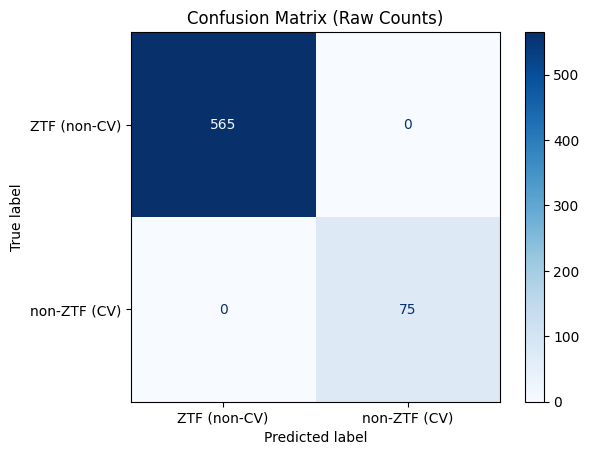


===== CONFUSION MATRIX ELEMENTS =====
True Negatives  (ZTF correctly classified): 565
False Positives (ZTF misclassified as non-ZTF): 0
False Negatives (non-ZTF misclassified as ZTF): 0
True Positives  (non-ZTF correctly classified): 75


In [15]:
# CONFUSION MATRIX + TP / TN / FP / FN IDENTIFICATION
# Class labels for clarity
class_names = ["ZTF (non-CV)", "non-ZTF (CV)"]

# Plot confusion matrix (raw counts)
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train_1,
    y_train_1,
    display_labels=class_names,
    cmap=plt.cm.Blues #heatmap
)

disp.ax_.set_title("Confusion Matrix (Raw Counts)")
print("Confusion matrix (raw counts):")
print(disp.confusion_matrix)

plt.show()


# Extract TN, FP, FN, TP explicitly
# Label convention used in YOUR code:
#   -1 → ZTF (negative, non-CV)
#   +1 → non-ZTF (positive, CV)

cm = confusion_matrix(y_train_1, clf.predict(X_train_1), labels=[-1, 1])

TN, FP, FN, TP = cm.ravel()

print("\n===== CONFUSION MATRIX ELEMENTS =====")
print(f"True Negatives  (ZTF correctly classified): {TN}")
print(f"False Positives (ZTF misclassified as non-ZTF): {FP}")
print(f"False Negatives (non-ZTF misclassified as ZTF): {FN}")
print(f"True Positives  (non-ZTF correctly classified): {TP}")


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.80,
    #shuffle=True
)

In [17]:
n_objects_in_test = len(y_test)

y_random = np.random.choice(
    [-1, 1],
    size=n_objects_in_test,
    replace=True
)

In [18]:
random_acc = accuracy_score(y_test, y_random)

print("Random baseline accuracy:", random_acc)

Random baseline accuracy: 0.5


In [19]:
#now we'll run a step by step code to implement most accurate number os trees in my random(n_estimator value) and test train split(test_size)
test_sizes = np.arange(0.5, 0.91, 0.01)          # 50% to 90% test_size
n_estimators_list = range(10, 151, 10)         # 10 to 150 trees


In [20]:
results = []

for ts in test_sizes:
    # Train/test split for this train size
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=ts,
        shuffle=True
    )
    for n in n_estimators_list:
        # Random Forest classifier
        clf = RandomForestClassifier(n_estimators=n)

        # Cross-validation only on training data
        scores = cross_val_score(clf, X_train, y_train, cv=5)

        # Store results including random baseline
        results.append({
            "train_size": ts,
            "n_estimators": n,
            "cv_mean": scores.mean(),
            "cv_std": scores.std(),
            "random_test_acc": random_acc
        })

        #  Print progress
        print(
            f"train_size={ts:.2f} | "
            f"n_estimators={n:3d} | "
            f"CV={scores.mean():.3f} ± {scores.std():.3f} | "
            f"Random baseline={random_acc:.3f}"
        )

train_size=0.50 | n_estimators= 10 | CV=0.957 ± 0.020 | Random baseline=0.500
train_size=0.50 | n_estimators= 20 | CV=0.957 ± 0.017 | Random baseline=0.500
train_size=0.50 | n_estimators= 30 | CV=0.950 ± 0.022 | Random baseline=0.500
train_size=0.50 | n_estimators= 40 | CV=0.958 ± 0.017 | Random baseline=0.500
train_size=0.50 | n_estimators= 50 | CV=0.957 ± 0.020 | Random baseline=0.500
train_size=0.50 | n_estimators= 60 | CV=0.960 ± 0.020 | Random baseline=0.500
train_size=0.50 | n_estimators= 70 | CV=0.957 ± 0.019 | Random baseline=0.500
train_size=0.50 | n_estimators= 80 | CV=0.957 ± 0.019 | Random baseline=0.500
train_size=0.50 | n_estimators= 90 | CV=0.960 ± 0.020 | Random baseline=0.500
train_size=0.50 | n_estimators=100 | CV=0.957 ± 0.023 | Random baseline=0.500
train_size=0.50 | n_estimators=110 | CV=0.960 ± 0.023 | Random baseline=0.500
train_size=0.50 | n_estimators=120 | CV=0.957 ± 0.019 | Random baseline=0.500
train_size=0.50 | n_estimators=130 | CV=0.960 ± 0.020 | Random b

In [21]:
#results
df_results = pd.DataFrame(results)
print(df_results.head())


   train_size  n_estimators  cv_mean    cv_std  random_test_acc
0         0.5            10   0.9575  0.020310              0.5
1         0.5            20   0.9575  0.016956              0.5
2         0.5            30   0.9500  0.022361              0.5
3         0.5            40   0.9575  0.016956              0.5
4         0.5            50   0.9575  0.020310              0.5


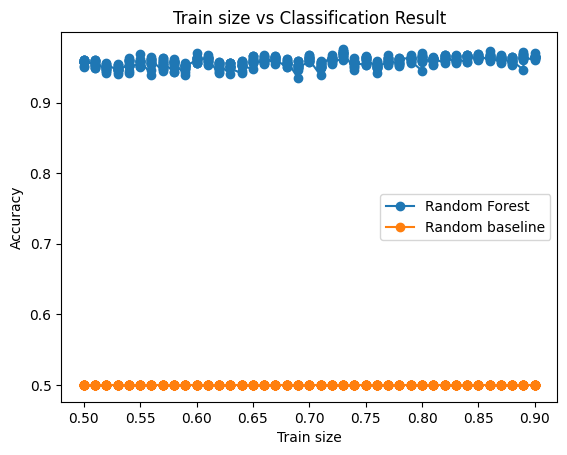

In [22]:
# Ensure 1D numeric arrays
x_train_size = df_results['train_size'].to_numpy()
y_cv_mean = df_results['cv_mean'].to_numpy()
y_random = df_results['random_test_acc'].to_numpy()  
#X-axis: train size, Y-axis: classification results
# Plot
plt.figure()
plt.plot(x_train_size, y_cv_mean, marker='o', label='Random Forest')
plt.plot(x_train_size, y_random, marker='o', label='Random baseline')
plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.title('Train size vs Classification Result')
plt.legend()
plt.show()


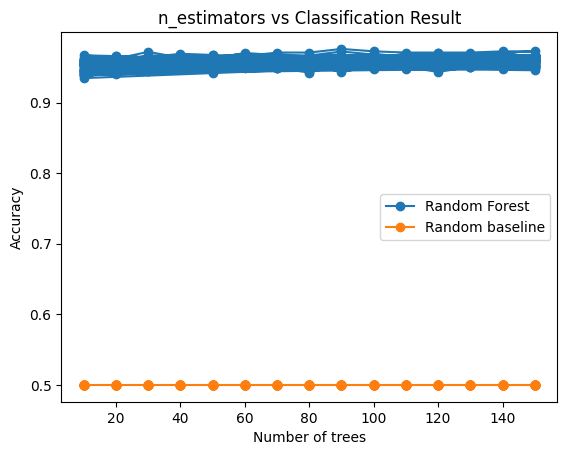

In [23]:
#X-axis: n_estimators, Y-axis: classification results
x_n_estimators = df_results['n_estimators'].to_numpy()

plt.figure()
plt.plot(x_n_estimators, y_cv_mean, marker='o', label='Random Forest')
plt.plot(x_n_estimators, y_random, marker='o', label='Random baseline')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('n_estimators vs Classification Result')
plt.legend()
plt.show()
